In [2]:
using LinearAlgebra
using Plots
using Pkg 
#Pkg.add("Random")
using Random

El Hamiltoniano que se nos plantea en el caso para $N = 3$ qubits es

$H = A_1 \cos(\theta) + A_2 \sin(\theta)$

donde $A_1$ y $A_2$ son operadores aleatorios, en el paper se realizó lo siguiente 

- Choose different eigenstates $\ket{\varphi_n}$ and plot their expectations on $A_1$ and $A_2$ 
- Plot the energy of $H$ with respect to the eigenstates $\ket{\varphi_n}$ as a function of $\theta$, for $n=0,...,7$


In [3]:
N = 3 # number of qubits
d = 2^N # dimension of the Hilbert space
#A1 = rand(d,d) #+ im*randn(d,d)
#A2 = rand(d,d) #+ im*randn(d,d)

sigmax = [0 1; 1 0]
sigmay = [0 -im; im 0]
sigmaz = [1 0; 0 -1]
id= I(2)

c1 = rand(1)
c2 = rand(1)

A1 = kron(sigmax, sigmay, id) # Para una cadena el primer qubit interactúa con el segundo y el segundo con el tercero 
A2 = kron(id, sigmay, sigmaz)

8×8 Matrix{Complex{Int64}}:
 0+0im  0+0im  0-1im  0+0im  0+0im  0+0im  0+0im  0+0im
 0+0im  0+0im  0+0im  0+1im  0+0im  0+0im  0+0im  0+0im
 0+1im  0+0im  0+0im  0+0im  0+0im  0+0im  0+0im  0+0im
 0+0im  0-1im  0+0im  0+0im  0+0im  0+0im  0+0im  0+0im
 0+0im  0+0im  0+0im  0+0im  0+0im  0+0im  0-1im  0+0im
 0+0im  0+0im  0+0im  0+0im  0+0im  0+0im  0+0im  0+1im
 0+0im  0+0im  0+0im  0+0im  0+1im  0+0im  0+0im  0+0im
 0+0im  0+0im  0+0im  0+0im  0+0im  0-1im  0+0im  0+0im

In [4]:
x = 0.5
H = A1.*cos(c1[1]) + A2.*sin(c2[1])	
eigvec = eigen(H).vectors
eigenvecadj = adjoint(eigvec) # Matriz adjunta de eigenvectores Duda: ¿los vectores bras de este Hamiltoniano son los vectores adjuntos? 
function expectationvalue(eigvec,eigenvecadj)
    expvalueA1 = zeros(ComplexF64, d,d)
    expvalueA2 = zeros(ComplexF64, d,d)
    for i in 1:d 
        vecadji = transpose(eigenvecadj[i,:])
        for j in 1:d
            veci = eigvec[:,i]
            expvalueA1[i,j] = vecadji*A1*veci
            expvalueA2[i,j] = vecadji*A2*veci
        end
    end
    return expvalueA1, expvalueA2
end

expectationvalue (generic function with 1 method)

In [25]:
function a1vsa2(xin,step,xfin, n) #n = 1 es el estado fundamental y n = 2 es el primer estado excitado, etc
    x = xin:step:xfin
    a1 = zeros(ComplexF64,length(x))
    a2 = zeros(ComplexF64,length(x))
    for i in 1:length(x)
        H = A1.*cos(x[i]) + A2.*sin(x[i])
        eigvec = eigen(H).vectors
        eigenvecadj = adjoint(eigvec) 
        rho = kron(eigvec[n,:],transpose(eigenvecadj[:,n])) # Matriz de densidad para el estado fundamental
        a1[i] = tr(rho*A1)
        a2[i] = tr(rho*A2)
    end
    return a1,a2
end

a1vsa2 (generic function with 1 method)

In [34]:
aa = a1vsa2(0,0.001,6,1)
bb = a1vsa2(0,0.001,6,2)
gg = a1vsa2(0,0.001,6,3)
#plot(imag(alpha[1]),imag(alpha[2]))

(ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -1.5688287573446083e-17 + 0.0im, 6.622185876052474e-17 + 0.0im, 4.0246384001800465e-19 + 0.0im, -2.4216612789448212e-18 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, -6.353357610325299e-17 + 0.0im, -5.071995609257469e-17 + 0.0im, 2.4062665995594393e-16 + 0.0im, -1.855767353425338e-16 + 0.0im, 0.0 + 0.0im, -4.169996370257971e-16 + 0.0im, -1.110223024625157e-16 + 0.0im, 1.201786819331776e-16 + 0.0im], ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, -4.145183692355846e-18 + 0.0im, 8.326672684688674e-17 + 0.0im, 1.5688287573455377e-17 + 0.0im, 6.62218587605289e-17 + 0.0im, -4.0246384001800143e-19 + 0.0im, 2.4216612789448073e-18 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  -2.0754510698799287e-17 + 0.0im, -0.1820348322303899 + 0.0im, -6.353357610325292e-17 + 0.0im, -2.0287982437029886e-17 + 0.0im, 8.020888665198126e-17 + 0.0im, -7.21687304109853e-17 + 0.0im, 1.4096661166547972e-16 + 0.0im, 9.382491833080401e-17 + 0.0im, -1.1102

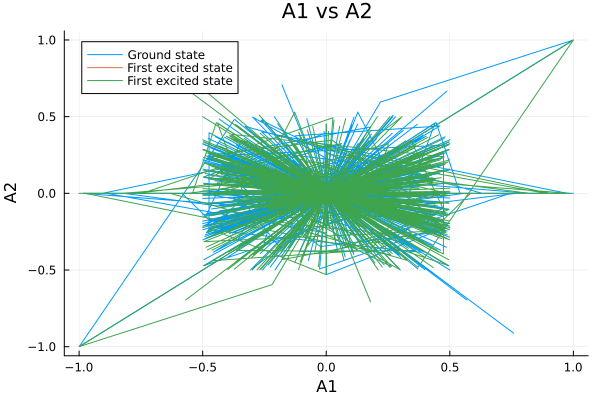

In [35]:
plot(real(aa[1]),real(aa[2]),xlabel = "A1", ylabel = "A2", label = "Ground state", title = "A1 vs A2")
plot!(real(bb[1]),real(bb[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")
plot!(real(gg[1]),real(gg[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")

In [36]:
function energyvsparameter(xmin,step,xmax)
    x = xmin:step:xmax
    energy = zeros(ComplexF64,d,length(x))
    for i in 1:length(x)
        H = A1.*cos(x[i]) + A2.*sin(x[i])
        energy[:,i] = eigen(H).values
    end
    return energy
end

energyvsparameter (generic function with 1 method)

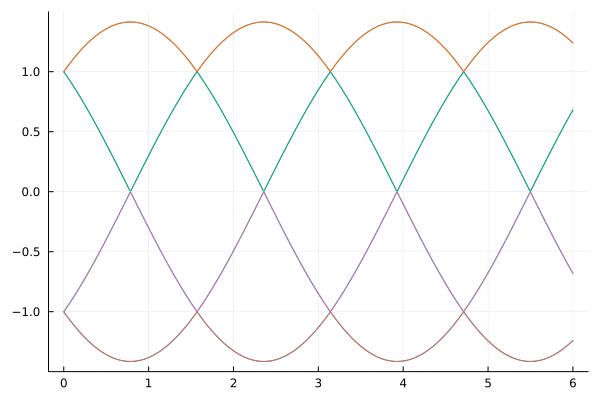

In [37]:
b = real(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,b', label = false)

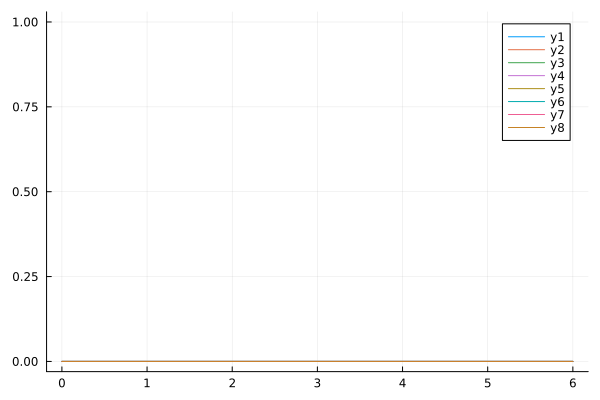

In [11]:
a = imag(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,a')

In [12]:
ket_n = eigvec[:,1]
bra_n = adjoint(ket_n)

1×8 adjoint(::Vector{ComplexF64}) with eltype ComplexF64:
 0.0+0.5im  -2.71555e-17-5.55112e-17im  …  -0.5+3.49584e-17im  0.0-0.0im

In [13]:
ket_n*bra_n

8×8 Matrix{ComplexF64}:
         0.25+0.0im          -2.77556e-17+1.35777e-17im  …   0.0-0.0im
 -2.77556e-17-1.35777e-17im   3.81891e-33+0.0im              0.0+0.0im
 -3.40504e-17-0.25im          1.35777e-17+2.77556e-17im      0.0+0.0im
          0.0+0.0im                   0.0-0.0im              0.0+0.0im
         0.25-3.77373e-17im  -2.77556e-17+1.35777e-17im     -0.0+0.0im
         -0.0-1.6748e-17im    9.09598e-34+1.8594e-33im   …   0.0+0.0im
  1.74792e-17-0.25im          1.35777e-17+2.77556e-17im     -0.0+0.0im
          0.0+0.0im                   0.0-0.0im              0.0+0.0im

In [14]:
kron(ket_n,bra_n)

8×8 Matrix{ComplexF64}:
         0.25+0.0im          -2.77556e-17+1.35777e-17im  …   0.0-0.0im
 -2.77556e-17-1.35777e-17im   3.81891e-33+0.0im              0.0+0.0im
 -3.40504e-17-0.25im          1.35777e-17+2.77556e-17im      0.0+0.0im
          0.0+0.0im                   0.0-0.0im              0.0+0.0im
         0.25-3.77373e-17im  -2.77556e-17+1.35777e-17im     -0.0+0.0im
         -0.0-1.6748e-17im    9.09598e-34+1.8594e-33im   …   0.0+0.0im
  1.74792e-17-0.25im          1.35777e-17+2.77556e-17im     -0.0+0.0im
          0.0+0.0im                   0.0-0.0im              0.0+0.0im

In [17]:
Vec = eigen(H).vectors

8×8 Matrix{ComplexF64}:
          0.0-0.5im           0.0+0.0im  …           0.0+0.5im
 -2.71555e-17+5.55112e-17im   0.0+0.5im      2.71555e-17+5.55112e-17im
         -0.5+6.81007e-17im   0.0+0.0im             -0.5-9.0801e-17im
          0.0+0.0im          -0.5+0.0im              0.0+0.0im
 -7.54746e-17-0.5im           0.0+0.0im     -2.29381e-17+0.5im
 -3.34959e-17+0.0im           0.0-0.5im  …   3.34959e-17+0.0im
         -0.5-3.49584e-17im   0.0+0.0im             -0.5+3.49584e-17im
          0.0+0.0im           0.5-0.0im              0.0+0.0im

In [18]:
Vec1 = inv(Vec)

8×8 Matrix{ComplexF64}:
  6.73873e-17+0.5im          …  1.73472e-17+4.14058e-34im
 -6.00088e-19-1.38778e-17im             0.5-2.17232e-49im
   6.6203e-17+0.5im             1.73472e-17-4.14058e-34im
 -5.74034e-18-1.38778e-17im            -0.5-1.66231e-48im
  5.26068e-19-0.5im             1.73472e-17+8.07845e-34im
 -5.74034e-18-1.38778e-17im  …          0.5-1.66231e-48im
 -6.00088e-19-1.38778e-17im            -0.5-2.17232e-49im
  2.20419e-17-0.5im             1.73472e-17-8.07845e-34im

In [20]:
Vec1*Vec

8×8 Matrix{ComplexF64}:
         1.0-1.84889e-32im  …  -1.11022e-16+2.31112e-32im
 3.08149e-33-2.31112e-33im     -3.08149e-33+1.38667e-32im
 2.77556e-17+3.08149e-33im     -2.22045e-16-7.70372e-33im
 6.16298e-33-6.16298e-33im              0.0+6.16298e-33im
 2.77556e-17+0.0im             -5.55112e-17+2.15704e-32im
 3.08149e-33-6.16298e-33im  …   -1.2326e-32+2.46519e-32im
         0.0-7.70372e-34im       1.2326e-32+0.0im
         0.0-1.54074e-33im              1.0+6.16298e-33im

In [21]:
Vecadj = adjoint(Vec)

8×8 adjoint(::Matrix{ComplexF64}) with eltype ComplexF64:
          0.0+0.5im  -2.71555e-17-5.55112e-17im  …   0.0-0.0im
          0.0-0.0im           0.0-0.5im              0.5+0.0im
  5.55112e-17+0.5im   2.20152e-17-1.11022e-16im      0.0-0.0im
          0.0-0.0im           0.0+0.5im             -0.5+0.0im
 -5.55112e-17-0.5im  -2.20152e-17-1.11022e-16im      0.0-0.0im
          0.0-0.0im           0.0+0.5im          …   0.5-0.0im
          0.0-0.0im           0.0-0.5im             -0.5+0.0im
          0.0-0.5im   2.71555e-17-5.55112e-17im      0.0-0.0im

Aparentemente el Hamiltoniano es Hermítico

In [ ]:
Vec*Vecadj
Vecadj*Vec 

8×8 Matrix{ComplexF64}:
         1.0+0.0im          …          0.0+0.0im
 2.79778e-31-5.14025e-18im             0.0+1.66533e-16im
 1.13501e-17+1.66533e-16im             0.0+0.0im
         0.0-0.0im             5.55112e-17+0.0im
 1.66533e-16+4.53454e-17im             0.0+0.0im
 2.77556e-17-6.34043e-18im  …          0.0+5.55112e-17im
 7.80791e-17+5.55112e-17im     3.46945e-17+0.0im
         0.0-0.0im                     1.0+0.0im

8×8 Matrix{ComplexF64}:
          1.0+0.0im          …   2.22045e-16-4.71391e-18im
  2.77556e-17-3.17021e-18im      2.77556e-17+3.17021e-18im
  5.55112e-17-2.04945e-17im     -1.38778e-16-7.5571e-17im
  1.38778e-17-3.03257e-17im      1.38778e-17+3.03257e-17im
 -5.55112e-17+1.09566e-16im      8.32667e-17-3.6201e-17im
 -2.08167e-17-3.03257e-17im  …  -2.08167e-17+3.03257e-17im
  2.77556e-17-3.17021e-18im      2.77556e-17+3.17021e-18im
  2.22045e-16+4.71391e-18im              1.0+0.0im